In [1]:
import tensorflow as tf
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from flows import *

import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
mc = np.load("../data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

sim_pt =  mc['sim_jets'][:, 0]
sim_eta = mc['sim_jets'][:, 1]
sim_phi = mc['sim_jets'][:, 2]
sim_m =   mc['sim_jets'][:, 3]

In [4]:
sim = np.vstack([sim_pt, sim_eta, sim_phi, sim_m]).T

In [5]:
sim_target = flow(sim, ckpt_path = 'sim/ckpt')

2022-12-08 23:43:55.236418: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 23:43:55.846846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21902 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:81:00.0, compute capability: 7.5
  0%|          | 0/40 [00:00<?, ?it/s]

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


100%|██████████| 40/40 [13:17:28<00:00, 1196.22s/it]  


In [6]:
N = sim.shape[0]
smp = sim_target.sample(N)

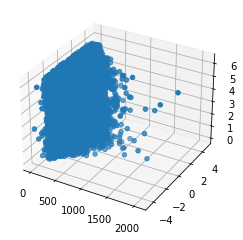

In [7]:
ax = plt.axes(projection='3d')
ax.scatter3D(sim[:, 0], sim[:, 1], sim[:, 2])

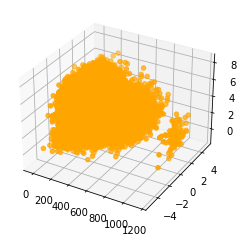

In [8]:
ax = plt.axes(projection='3d')
ax.scatter3D(smp[:, 0], smp[:, 1], smp[:, 2], c = 'orange')

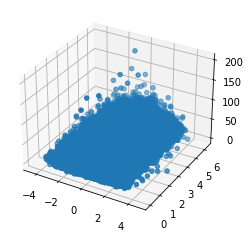

In [9]:
ax = plt.axes(projection='3d')
ax.scatter3D(sim[:, 1], sim[:, 2], sim[:, 3])

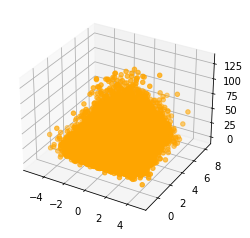

In [10]:
ax = plt.axes(projection='3d')
ax.scatter3D(smp[:, 1], smp[:, 2], smp[:, 3], c = 'orange')

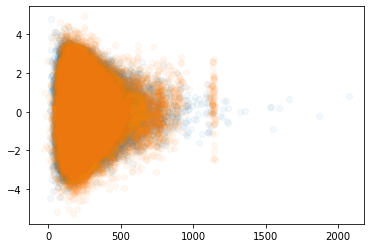

In [11]:
plt.scatter(sim[:, 0], sim[:, 1], alpha = 0.05)
plt.scatter(smp[:, 0], smp[:, 1], alpha = 0.05)

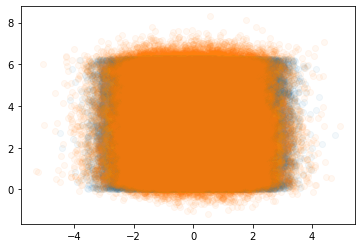

In [12]:
plt.scatter(sim[:, 1], sim[:, 2], alpha = 0.05)
plt.scatter(smp[:, 1], smp[:, 2], alpha = 0.05)

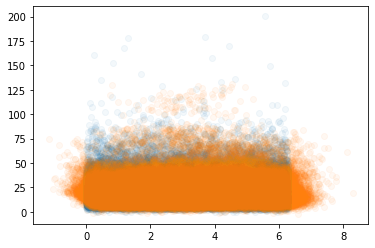

In [13]:
plt.scatter(sim[:, 2], sim[:, 3], alpha = 0.05)
plt.scatter(smp[:, 2], smp[:, 3], alpha = 0.05)